In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_json('purchase_data.json')

In [4]:
df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts()

Male                     465
Female                   100
Other / Non-Disclosed      8
Name: Gender, dtype: int64

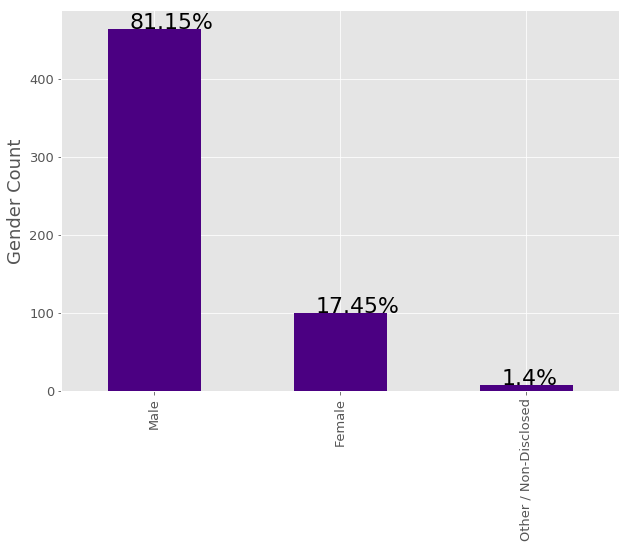

In [6]:
ax2 = df.groupby(['SN', 'Gender']).count().reset_index()['Gender'].value_counts().plot(kind='bar', figsize=(10,7),
                                                  color="indigo", fontsize=13);
ax2.set_alpha(0.8)
ax2.set_ylabel("Gender Count", fontsize=18);
ax2.set_yticks([i for i in range(0,500,100)])

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax2.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax2.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax2.text(i.get_x()+.12, i.get_height(), \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='black')

**Female**

In [12]:
df_female = df.loc[df['Gender'] == 'Female']
df_female.head()

,Age,Gender,Item ID,Item Name,Price,SN
7,29,Female,169,"Interrogator, Blood Blade of the Queen",3.32,Iathenudil29
16,22,Female,123,Twilight's Carver,1.14,Sundista85
17,22,Female,59,"Lightning, Etcher of the King",1.65,Aenarap34
22,11,Female,11,Brimstone,2.52,Deural48
29,16,Female,45,Glinting Glass Edge,2.46,Phaedai25


In [14]:
total = df_female['Price'].sum()
total

382.90999999999997

In [16]:
normalized_total = total/df_female['SN'].nunique()
normalized_total

3.8290999999999995

**Male**

In [17]:
df_male = df.loc[df['Gender'] == 'Male']
df_male.head()

,Age,Gender,Item ID,Item Name,Price,SN
0,38,Male,165,Bone Crushing Silver Skewer,3.37,Aelalis34
1,21,Male,119,"Stormbringer, Dark Blade of Ending Misery",2.32,Eolo46
2,34,Male,174,Primitive Blade,2.46,Assastnya25
3,21,Male,92,Final Critic,1.36,Pheusrical25
4,23,Male,63,Stormfury Mace,1.27,Aela59


In [20]:
total_m = df_male['Price'].sum()
total_m

1867.68

In [21]:
normalized_total_m = total_m/df_male['SN'].nunique()
normalized_total_m

4.016516129032258

## Top Spenders

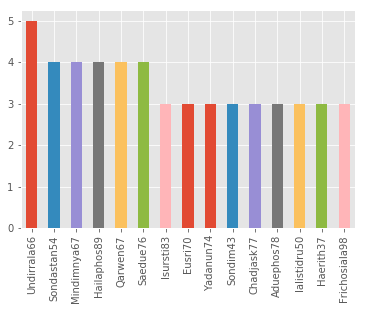

In [7]:
df['SN'].value_counts().head(15).plot.bar();

**Since the value count is the same for the 5th item and the 8th items, I included those in top items.**

In [39]:
top_spenders = list(df['SN'].value_counts()[:6].to_dict().keys())

In [40]:
mask_spend = df['SN'].isin(top_spenders)

In [41]:
top_spenders_df = df[mask_spend]

In [56]:
top_spenders_df.sort_values('SN')
#AGGREGATE? 

,Age,Gender,Item ID,Item Name,Price,SN
767,20,Male,122,Unending Tyranny,1.21,Hailaphos89
93,20,Male,20,Netherbane,1.48,Hailaphos89
429,20,Male,82,Nirvana,1.11,Hailaphos89
218,20,Male,31,Trickster,2.07,Hailaphos89
623,39,Female,161,Devine,1.45,Mindimnya67
592,39,Female,145,Fiery Glass Crusader,4.45,Mindimnya67
464,39,Female,163,Thunderfury Scimitar,3.02,Mindimnya67
450,39,Female,140,Striker,3.82,Mindimnya67
673,11,Male,176,Relentless Iron Skewer,2.97,Qarwen67
24,11,Male,65,Conqueror Adamantite Mace,1.96,Qarwen67


## Most Popular Items

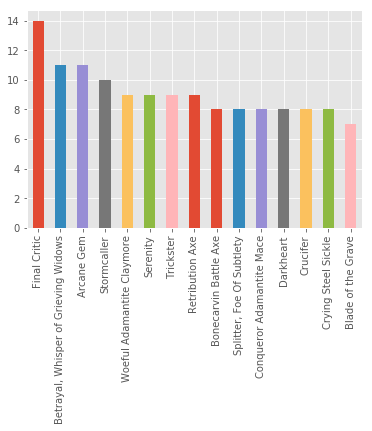

In [57]:
df['Item Name'].value_counts().head(15).plot.bar();

In [ ]:
top_items = list(df['Item Name'].value_counts()[:8].to_dict().keys())


In [ ]:
top_items

In [ ]:
mask = df['Item Name'].isin(top_items)

In [ ]:
top_items_df = df[mask]

In [ ]:
top_items_df.sort_values(['Item Name']).head()
#TODO should item name be index? how to display top item at the top? 

## Most Profitable Items

In [ ]:
#df[''].value_counts().head(15).plot.bar();
#TODO - Calculations so I know what these are 